In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *

In [3]:
spec_names=('gap', 'shifted_gap', 'log10_gap', 'log10_shifted_gap', 'ratio')

In [4]:
dim_loc=3
L=5
n_dis=100
simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
phi=np.pi/6
time_set= np.power(2, np.arange(40))
idata={'JZZ': 1.0, 'hZ': 0.3, 'hX': 0.1, 'alphas': np.array([np.exp(1j*phi), np.exp(-1j*phi)]),\
       'betas': np.ones(dim_loc-1), 'lambdas': np.ones(dim_loc-1), 'phi': phi}
filename='clock3_'+str(L)+'.txt'

In [104]:
clockH, clockK, clockZ = clock(dim_loc, L)
Z_mean, Z_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, time_set)

with open(filename, 'wb') as f:
        for key, value in simdict.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for key, value in idata.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for i in range(5):
            f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
        f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
        np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean), np.real(Z_var), np.imag(Z_var)), axis=-1))

size 5 	disorder realization 0 	time elapsed 0.3951399326324463
size 5 	disorder realization 1 	time elapsed 0.44855213165283203
size 5 	disorder realization 2 	time elapsed 0.6248669624328613
size 5 	disorder realization 3 	time elapsed 0.39488697052001953
size 5 	disorder realization 4 	time elapsed 0.6608462333679199
size 5 	disorder realization 5 	time elapsed 0.8465783596038818
size 5 	disorder realization 6 	time elapsed 0.6173365116119385
size 5 	disorder realization 7 	time elapsed 0.6353888511657715
size 5 	disorder realization 8 	time elapsed 0.6212103366851807
size 5 	disorder realization 9 	time elapsed 0.5844461917877197
size 5 	disorder realization 10 	time elapsed 0.5659451484680176
size 5 	disorder realization 11 	time elapsed 0.40970563888549805
size 5 	disorder realization 12 	time elapsed 0.43209242820739746
size 5 	disorder realization 13 	time elapsed 0.4401099681854248
size 5 	disorder realization 14 	time elapsed 0.42649149894714355
size 5 	disorder realization 1

In [5]:
import re

lenarr=len(time_set)

dt = np.dtype([('JZZ', np.float64), ('hZ', np.float64), ('hX', np.float64), 
               ('FILENAME', np.unicode_, 32), ('phi', np.float64), ('dim_loc', np.int32),
               ('n_dis', np.int32), ('L', np.int32), ('time_set', np.float64, (lenarr,)),
               ('ReZ', np.float64, (lenarr,)), ('ImZ', np.float64, (lenarr,)), ('ReVarZ', np.float64, (lenarr,)),
               ('ImVarZ', np.float64, (lenarr,))])

def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], d['ReVarZ'], d['ImVarZ']=np.genfromtxt(file, unpack=True, dtype=np.complex128)
    return d


In [108]:
dataset=np.empty(0, dtype=dt)
for L in range(2,6):
    d=get_data('clock3_%d.txt' %L)
    dataset=np.append(dataset, d)

/home/federica/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


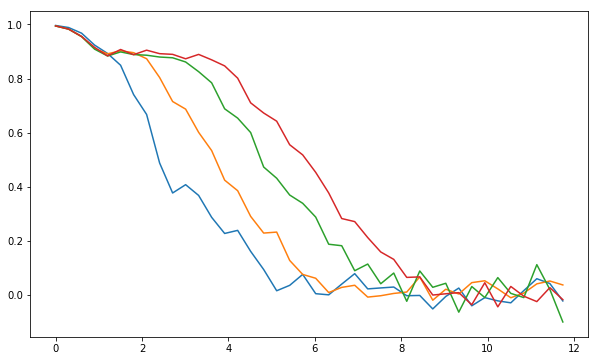

In [111]:
f, ax = plt.subplots(1,1,figsize=(10,6))

for sim in dataset:
    ax.plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % L)

plt.show()

In [6]:
def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], Varz=np.genfromtxt(file, unpack=True, dtype=np.complex128)
    return d

In [27]:
dataset=np.empty(0, dtype=dt)
for L in range(2,7):
    d=get_data('pertkick/Z_02_0%d.dat' %L)
    dataset=np.append(dataset, d)

/home/federica/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part


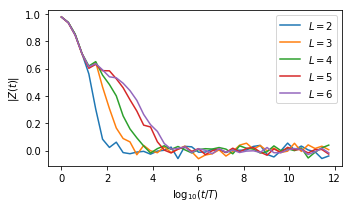

In [28]:
f, ax = plt.subplots(1,1,figsize=(5,3))

for sim in dataset:
    ax.plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % sim['L'])

ax.set_xlabel(r'$\log_{10} (t/T)$')
ax.set_ylabel(r'$|Z(t)|$')
ax.legend()
plt.tight_layout()
#plt.show()
#plt.savefig('pertkick/pertkick2.eps')

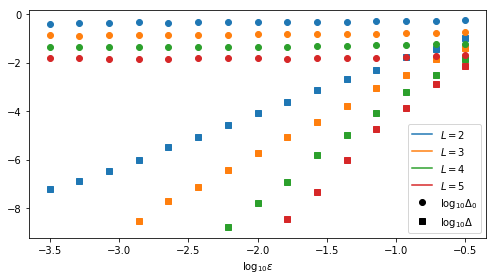

In [49]:
f2, ax2 = plt.subplots(1,1,figsize=(7,4))
phivec=np.array([np.pi/24, np.pi/12, np.pi/8, np.pi/6, -np.pi/24, -np.pi/12, -np.pi/8, -np.pi/6])

phinum=2

linesym=[]

for L in range(2,6):
    epsilon, gaps, shifted_gaps, log10_gaps, log10_shifted_gaps, ratio,\
    var_gaps, var_shifted_gaps, var_log10_gaps, var_log10_shifted_gaps, var_ratio\
        = np.loadtxt('pertkick_spectrum/spectrum_07_0%d.dat' %L, unpack=True)
    ax2.plot(np.log10(epsilon), log10_shifted_gaps,label= r'$L=$%d' % L, color='C%d' %(L-2),marker='s', linestyle='')
    ax2.plot(np.log10(epsilon), log10_gaps, marker='o', color='C%d' %(L-2), linestyle='')
    linesym.append(plt.Line2D((0,1),(0,0), color='C%d' %(L-2)))


#Get artists and labels for legend and chose which ones to display
handles, labels = ax2.get_legend_handles_labels()
labels, linesym = zip(*sorted(zip(labels, linesym), key=lambda t: t[0]))

#Create custom artists
symo = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
syms = plt.Line2D((0,1),(0,0), color='k', marker='s', linestyle='')

#Create legend from custom artist/label lists
#figleg, axleg=plt.subplots(nrows=1, figsize=(2,2.5))
#axleg.axis('off')
#legend=axleg.legend(list(linesym)+[symo, syms], list(labels)+['$\log_{10}\Delta_0$', '$\log_{10}\Delta$'], loc='upper center', shadow=False, numpoints=1)
legend=ax2.legend(list(linesym)+[symo, syms], list(labels)+['$\log_{10}\Delta_0$', '$\log_{10}\Delta$'], loc='lower right', shadow=False, numpoints=1)
    
ax2.set_xlabel(r'$\log_{10} \epsilon$')
plt.tight_layout()    